In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.display.max_colwidth = 100
import sqlite3

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
import glob

In [4]:
con = sqlite3.connect("impression_1021.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM impressioncontents")
results = cursor.fetchall()

df = pd.read_sql_query("SELECT * FROM impressioncontents", con)

In [5]:
df.head(1)

,id,name,reference1,reference2,target,impression,date,count,num_touches
0,1,hoge,/templates/color/YELLOW.png,/templates/color/RED.png,/templates/Image/targets/sketch_027_000039.png,-17.0,2021-10-10 19:39:06.155428,1,1


In [6]:
df.tail(1)

,id,name,reference1,reference2,target,impression,date,count,num_touches
16220,16231,melody.s12.sun@gmail.com,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_238_000072.png,-13.0,2021-10-21 15:47:15.885963,501,1


In [7]:
df['name'].value_counts().head()

14236koyama@keio.jp      1008
aeol.yy@keio.jp           770
hoge2                     745
ryoyayakuruto@keio.jp     636
reokoba@keio.jp           595
Name: name, dtype: int64

In [8]:
# df = df.query('num_touches != 0
# 触った回数が0 => 画像がうまく読み込めていない、or 見失った。　ので削除する。
df_0 = df
df = df[df['num_touches'] !=0]

In [9]:
df = df[(df['name']!='hoge2') & (df['name']!='hoge3') & (df['name']!='hoge') & (df['name']!='komei') & (df['name']!='saito')]

In [10]:
df.reset_index(drop=True).head()

,id,name,reference1,reference2,target,impression,date,count,num_touches
0,1065,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_007_000051.png,44.0,2021-10-13 17:04:59.234729,1,1
1,1066,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/i620ye-fn.png,-40.0,2021-10-13 17:05:05.007810,2,1
2,1067,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/RED.png,/templates/Image/targets/i086sd-fn.png,-38.0,2021-10-13 17:05:10.037438,3,1
3,1068,naoto_yoshida@keio.jp,/templates/color/RED.png,/templates/color/BLUE_GREEN.png,/templates/Image/targets/sketch_327_000113.png,-32.0,2021-10-13 17:05:15.174908,4,1
4,1070,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_001_000023.png,-39.0,2021-10-13 17:05:24.343812,5,1


In [11]:
# アノテーションされている回数は？
len(df)

13243

In [12]:
df['name'].value_counts().sort_index()

14236koyama@keio.jp           501
aeol.yy@keio.jp               501
ao-yuto.0311@keio.jp          502
d.kishimoto@keio.jp           100
d.takamura.1102@keio.jp       501
dingxiaochun@keio.jp          501
hebi0713@keio.jp              502
johnson0@keio.jp              501
jump1204                      501
k.rex829@keio.jp              501
karent@keio.jp                108
keio-universe@keio.jp         501
kenshin.nambu@keio.jp         502
khayashi0902@gmail.com        502
kimura.881014@keio.jp         503
mashiro_12.mi@keio.jp         504
melody.s12.sun@gmail.com      501
nagatarokuto@keio.jp          501
naoto_yoshida@keio.jp         501
osaki@keio.jp                 501
reokoba@keio.jp               501
ryoyayakuruto@keio.jp         501
sachigc027@keio.jp            501
sawako_tajima_0727@keio.jp    501
takkawa0624@keio.jp           501
taro.tokui@keio.jp            501
yusuke.k-1129@keio.jp         501
yutaroyamanaka@keio.jp        501
Name: name, dtype: int64

In [13]:
# 何名のユーザーが実験をしているか？
df['name'].nunique()

28

In [70]:
df['name'].value_counts()

mashiro_12.mi@keio.jp         504
kimura.881014@keio.jp         503
ao-yuto.0311@keio.jp          502
hebi0713@keio.jp              502
khayashi0902@gmail.com        502
kenshin.nambu@keio.jp         502
ryoyayakuruto@keio.jp         501
keio-universe@keio.jp         501
takkawa0624@keio.jp           501
jump1204                      501
osaki@keio.jp                 501
yutaroyamanaka@keio.jp        501
nagatarokuto@keio.jp          501
melody.s12.sun@gmail.com      501
reokoba@keio.jp               501
k.rex829@keio.jp              501
d.takamura.1102@keio.jp       501
aeol.yy@keio.jp               501
taro.tokui@keio.jp            501
johnson0@keio.jp              501
dingxiaochun@keio.jp          501
naoto_yoshida@keio.jp         501
14236koyama@keio.jp           501
sawako_tajima_0727@keio.jp    501
yusuke.k-1129@keio.jp         501
sachigc027@keio.jp            501
karent@keio.jp                108
d.kishimoto@keio.jp           100
Name: name, dtype: int64

# impressionの値を見て寒色か暖色を分けるcolumnsを作る

In [14]:
df['cool_warm'] = 0

In [15]:
# cool == 0 , warm == 1 とする。
# where では、Trueの値はそのままに、falseの値が第二引数になる。　
# つまり、Oであるcoolは変更しないでよくて、1であるwarmを変更したいので、暖色の条件をwhereにすれば良い。
# わかりにくいからmaskにした。maskはその逆

df['cool_warm'] = df['cool_warm'].mask((df['impression']<0)&(df['reference1'].str.contains('YELLOW|RED')), 1)
df['cool_warm'] = df['cool_warm'].mask((df['impression']>0)&(df['reference2'].str.contains('YELLOW|RED')), 1)

# df['cool_warm'] = df['cool_warm'].where((df['impression']<0)&(df['reference1'].str.contains('BLUE|BLUE_GREEN')),1)
# df['cool_warm'] = df['cool_warm'].where((df['impression']>0)&(df['reference2'].str.contains('BLUE|BLUE_GREEN')),1)

In [16]:
# 若干、寒色の方が多い？？
df['cool_warm'].value_counts()

0    6861
1    6382
Name: cool_warm, dtype: int64

In [17]:
df.head()

,id,name,reference1,reference2,target,impression,date,count,num_touches,cool_warm
1064,1065,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_007_000051.png,44.0,2021-10-13 17:04:59.234729,1,1,1
1065,1066,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/i620ye-fn.png,-40.0,2021-10-13 17:05:05.007810,2,1,0
1066,1067,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/RED.png,/templates/Image/targets/i086sd-fn.png,-38.0,2021-10-13 17:05:10.037438,3,1,0
1067,1068,naoto_yoshida@keio.jp,/templates/color/RED.png,/templates/color/BLUE_GREEN.png,/templates/Image/targets/sketch_327_000113.png,-32.0,2021-10-13 17:05:15.174908,4,1,1
1069,1070,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_001_000023.png,-39.0,2021-10-13 17:05:24.343812,5,1,0


# カテゴリーのごとのリストを作る

In [18]:
domain_list = df[df['target'].str.contains('sketch')]['target'].values.tolist()
muct_list = df[df['target'].str.contains('-')]['target'].values.tolist()
tezuka_list = df[(~df['target'].isin(domain_list))&(~df['target'].isin(muct_list))]['target'].values.tolist()

In [19]:
# 数の確認
len(df) , len(domain_list) ,len(muct_list) ,len(tezuka_list) 

(13243, 5275, 5247, 2721)

# 個人ごとに正規化する。min_max_scalarを使用する。

In [20]:
from sklearn import preprocessing

In [21]:
df['impression_minmax'] = df.groupby('name')['impression'].transform(lambda x: preprocessing.minmax_scale(x.astype(float)))

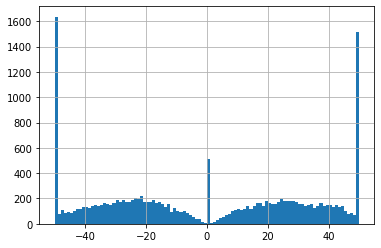

In [22]:
df_0['impression'].hist(bins=100)

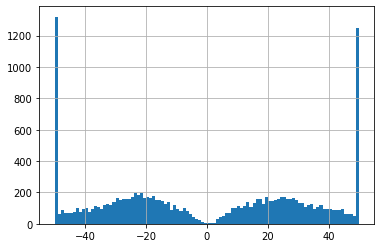

In [23]:
df['impression'].hist(bins=100)

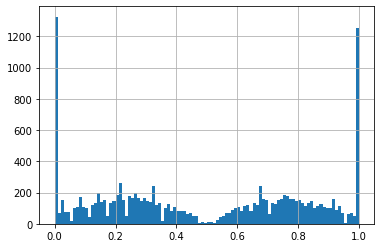

In [24]:
df['impression_minmax'].hist(bins=100)

9500枚のうちどれほどの画像がアノテーションされているか？

In [25]:
df['target'].nunique() , len(glob.glob('targets/*.png'))

(7139, 9469)

In [26]:
# 触った回数
df['num_touches'].value_counts()

1    12972
2      265
3        6
Name: num_touches, dtype: int64

個人の箱髭図

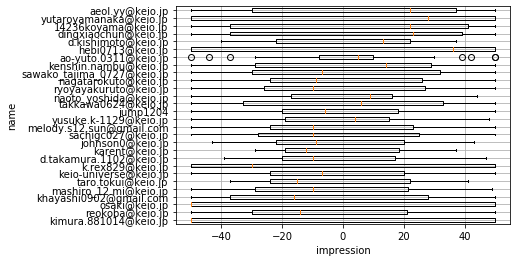

In [27]:
group_label = 'name'
target_label = 'impression'

grouped = df.groupby(group_label)
agg = df.groupby(group_label).agg('mean').sort_values(target_label)

Y = []
labels = []
for index in agg.index.values:
    labels.append(index)
    Y.append(grouped.get_group(index)[target_label])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel(group_label)
plt.grid(True)
plt.show()

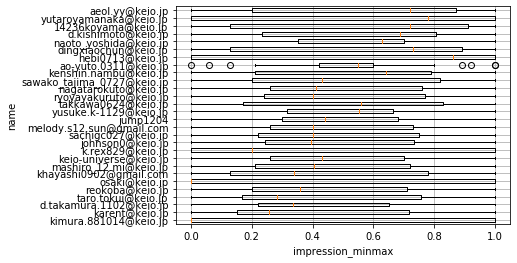

In [28]:
group_label = 'name'
target_label = 'impression_minmax'

grouped = df.groupby(group_label)
agg = df.groupby(group_label).agg('mean').sort_values(target_label)

Y = []
labels = []
for index in agg.index.values:
    labels.append(index)
    Y.append(grouped.get_group(index)[target_label])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel(group_label)
plt.grid(True)
plt.show()

impressionの個人ごとの値の分布はどうなっているか？

name
14236koyama@keio.jp           AxesSubplot(0.125,0.125;0.775x0.755)
aeol.yy@keio.jp               AxesSubplot(0.125,0.125;0.775x0.755)
ao-yuto.0311@keio.jp          AxesSubplot(0.125,0.125;0.775x0.755)
d.kishimoto@keio.jp           AxesSubplot(0.125,0.125;0.775x0.755)
d.takamura.1102@keio.jp       AxesSubplot(0.125,0.125;0.775x0.755)
dingxiaochun@keio.jp          AxesSubplot(0.125,0.125;0.775x0.755)
hebi0713@keio.jp              AxesSubplot(0.125,0.125;0.775x0.755)
johnson0@keio.jp              AxesSubplot(0.125,0.125;0.775x0.755)
jump1204                      AxesSubplot(0.125,0.125;0.775x0.755)
k.rex829@keio.jp              AxesSubplot(0.125,0.125;0.775x0.755)
karent@keio.jp                AxesSubplot(0.125,0.125;0.775x0.755)
keio-universe@keio.jp         AxesSubplot(0.125,0.125;0.775x0.755)
kenshin.nambu@keio.jp         AxesSubplot(0.125,0.125;0.775x0.755)
khayashi0902@gmail.com        AxesSubplot(0.125,0.125;0.775x0.755)
kimura.881014@keio.jp         AxesSubplot(0.125,0.125;0.7

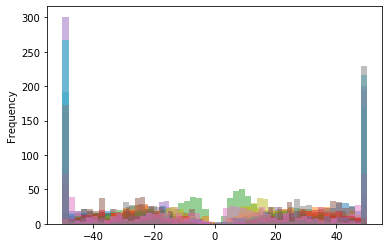

In [29]:
df.groupby('name')['impression'].plot.hist(bins=50, alpha=0.5)

In [30]:
df.groupby('name')['impression'].agg(['min', 'max','mean', 'std']).head()

,min,max,mean,std
name,,,,
14236koyama@keio.jp,-50.0,50.0,4.265469,38.322831
aeol.yy@keio.jp,-50.0,50.0,6.093812,35.623043
ao-yuto.0311@keio.jp,-50.0,50.0,1.035857,12.307224
d.kishimoto@keio.jp,-40.0,37.0,1.280000,23.066036
d.takamura.1102@keio.jp,-39.0,47.0,-2.622754,20.357294


In [31]:
df['impression'].agg(['mean', 'std'])

mean    -1.007702
std     33.242864
Name: impression, dtype: float64

# 寒色と暖色の組み合わせのdfを作成する

colorsはどのような色か？

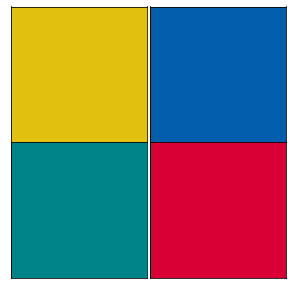

In [32]:
colors = glob.glob('color/*.png')
d = []
pm=2
for i in colors:
    img = Image.open(i)
    img = np.asarray(img)
    d.append(img)
# タイル状に画像を一覧表示
fig, ax = plt.subplots(2,2,figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(pm):
    for j in range(pm):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(d[pm*i+j], cmap="bone")
plt.show()

In [33]:
# 2色とも暖色のとき
df_warm = df[df['reference1'].str.contains('YELLOW|RED')]
df_warm = df_warm[df_warm['reference2'].str.contains('YELLOW|RED')]
print('2色とも暖色のときの回数',len(df_warm))

2色とも暖色のときの回数 2172


In [34]:
# 2色とも寒色の時
df_cool = df[df['reference1'].str.contains('BLUE|BLUE_GREEN')]
df_cool = df_cool[df_cool['reference2'].str.contains('BLUE|BLUE_GREEN')]
print('2色とも寒色のときの回数',len(df_cool))

2色とも寒色のときの回数 2267


In [35]:
warm_list = df_warm['id'].values.tolist()
cool_list = df_cool['id'].values.tolist()

In [36]:
# 寒色と暖色が現れた時
df_coolwarm = df[(~df['id'].isin(warm_list))&(~df['id'].isin(cool_list))]
print('寒色と暖色のときの回数',len(df_coolwarm))

寒色と暖色のときの回数 8804


In [37]:
df_coolwarm.groupby('target')['cool_warm'].agg(['min', 'max','mean']).head()

,min,max,mean
target,,,
/templates/Image/targets/J・ムラカミ_00003.png,0,1,0.500000
/templates/Image/targets/J・ムラカミ_00004.png,1,1,1.000000
/templates/Image/targets/J・ムラカミ_00008.png,1,1,1.000000
/templates/Image/targets/NUSTVアナウンサー_00003.png,0,1,0.666667
/templates/Image/targets/NUSTVアナウンサー_00004.png,0,0,0.000000


In [38]:
df_coolwarm.head(1)

,id,name,reference1,reference2,target,impression,date,count,num_touches,cool_warm,impression_minmax
1064,1065,naoto_yoshida@keio.jp,/templates/color/BLUE_GREEN.png,/templates/color/YELLOW.png,/templates/Image/targets/sketch_007_000051.png,44.0,2021-10-13 17:04:59.234729,1,1,1,1.0


カテゴリーごとに寒色か暖色が多いかを確認する

In [39]:
# 寒色と暖色が現れた時の、カテゴリーごとの寒色か暖色かの割合。
print('all',df_coolwarm['cool_warm'].mean())
print('domain',df_coolwarm[df_coolwarm['target'].isin(domain_list)]['cool_warm'].mean())
print('muct',df_coolwarm[df_coolwarm['target'].isin(muct_list)]['cool_warm'].mean())
print('tezuka',df_coolwarm[df_coolwarm['target'].isin(tezuka_list)]['cool_warm'].mean())

all 0.4781917310313494
domain 0.46960227272727273
muct 0.47010014306151643
tezuka 0.5108999441028508


# 寒色と暖色が選択肢の時に、画像では他の人と一致するのだろうか？

画像ごとに対して寒色か暖色か分けることができているのか？を確認する。手順としては、targetごとのcool_warmの平均値を取り出す？

In [40]:
# 何回アノテーションされているかどうか？
df_target = df_coolwarm['target'].value_counts().reset_index()

In [41]:
df_target.head()

,index,target
0,/templates/Image/targets/sketch_269_000341.png,7
1,/templates/Image/targets/sketch_268_000339.png,7
2,/templates/Image/targets/大日本鋼機株主代表_00001.png,6
3,/templates/Image/targets/i298ud-fn.png,5
4,/templates/Image/targets/亜子_00004.png,5


In [42]:
# n回アノテーションされているものを取り出す。
target_list = df_target['index'].values.tolist()
df_coolwarm_target = df_coolwarm[df_coolwarm['target'].isin(target_list)]
df_mean = df_coolwarm_target.groupby('target')['cool_warm'].agg(['mean','count']).reset_index()
df_mean.head()

,target,mean,count
0,/templates/Image/targets/J・ムラカミ_00003.png,0.500000,2
1,/templates/Image/targets/J・ムラカミ_00004.png,1.000000,1
2,/templates/Image/targets/J・ムラカミ_00008.png,1.000000,1
3,/templates/Image/targets/NUSTVアナウンサー_00003.png,0.666667,3
4,/templates/Image/targets/NUSTVアナウンサー_00004.png,0.000000,1


In [43]:
# n 回アノテーションされた画像は ? 枚あるが、そのうち意見が割れていない（平均値が0.5でない）割合は、 ?
def wariai(n , df_mean , a):
    df_mean = df_mean[df_mean['count']==n]
    return print(n,'回アノテーションされた画像は',len(df_mean),'枚あるが、そのうち平均値が',a,'の画像数と割合は、' , len(df_mean[df_mean['mean'] == a]),'枚で',len(df_mean[df_mean['mean'] == a]) / len(df_mean) * 100 ,'%')

In [44]:
df_mean

,target,mean,count
0,/templates/Image/targets/J・ムラカミ_00003.png,0.500000,2
1,/templates/Image/targets/J・ムラカミ_00004.png,1.000000,1
2,/templates/Image/targets/J・ムラカミ_00008.png,1.000000,1
3,/templates/Image/targets/NUSTVアナウンサー_00003.png,0.666667,3
4,/templates/Image/targets/NUSTVアナウンサー_00004.png,0.000000,1
...,...,...,...
5746,/templates/Image/targets/須形まなめ_00004.png,0.500000,2
5747,/templates/Image/targets/須形まなめ_00010.png,0.000000,2
5748,/templates/Image/targets/須形まなめ_00012.png,1.000000,2
5749,/templates/Image/targets/鳥_00002.png,0.500000,2


In [45]:
# アノテーションが２回された時
for i in [0,0.5,1]:
    wariai(2,df_mean,i)
print('合計',len(df_mean[df_mean['count']==2]))

2 回アノテーションされた画像は 1567 枚あるが、そのうち平均値が 0 の画像数と割合は、 476 枚で 30.376515634971284 %
2 回アノテーションされた画像は 1567 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 721 枚で 46.01148691767709 %
2 回アノテーションされた画像は 1567 枚あるが、そのうち平均値が 1 の画像数と割合は、 370 枚で 23.611997447351627 %
合計 1567


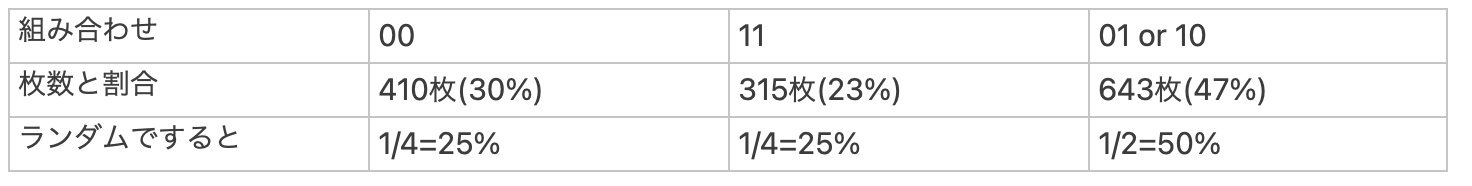

In [46]:
# 4回された時
for i in [0,0.25,0.5,0.75,1]:
    wariai(4,df_mean,i)
print('合計',len(df_mean[df_mean['count']==4]))

4 回アノテーションされた画像は 123 枚あるが、そのうち平均値が 0 の画像数と割合は、 10 枚で 8.130081300813007 %
4 回アノテーションされた画像は 123 枚あるが、そのうち平均値が 0.25 の画像数と割合は、 28 枚で 22.76422764227642 %
4 回アノテーションされた画像は 123 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 37 枚で 30.081300813008134 %
4 回アノテーションされた画像は 123 枚あるが、そのうち平均値が 0.75 の画像数と割合は、 40 枚で 32.52032520325203 %
4 回アノテーションされた画像は 123 枚あるが、そのうち平均値が 1 の画像数と割合は、 8 枚で 6.504065040650407 %
合計 123



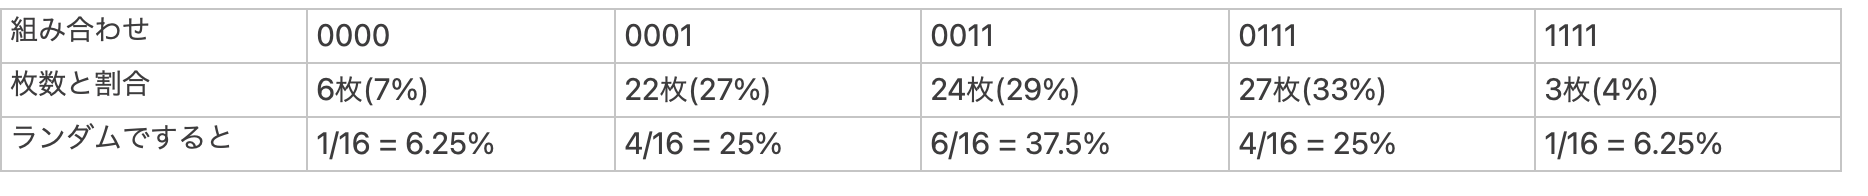

カテゴリごとに分ける。

In [47]:
# カテゴリごとに分ける。
domain_list = df_mean[df_mean['target'].str.contains('sketch')]['target'].values.tolist()
muct_list = df_mean[df_mean['target'].str.contains('-')]['target'].values.tolist()
tezuka_list = df_mean[(~df_mean['target'].isin(domain_list))&(~df_mean['target'].isin(muct_list))]['target'].values.tolist()
# 数の確認
len(df_mean) , len(domain_list) ,len(muct_list) ,len(tezuka_list) 

(5751, 2278, 2284, 1189)

In [48]:
# カテゴリごとに分けて2回アノテーションされた時の割合をみる。
n=2
# アノテーションが２回された時
print('domainnet')
for i in [0,0.5,1]:
    wariai(n,df_mean[df_mean['target'].isin(domain_list)],i)

print('muct')
for i in [0,0.5,1]:
    wariai(n,df_mean[df_mean['target'].isin(muct_list)],i)

print('tezuka')
for i in [0,0.5,1]:
    wariai(n,df_mean[df_mean['target'].isin(tezuka_list)],i)

domainnet
2 回アノテーションされた画像は 610 枚あるが、そのうち平均値が 0 の画像数と割合は、 190 枚で 31.147540983606557 %
2 回アノテーションされた画像は 610 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 269 枚で 44.09836065573771 %
2 回アノテーションされた画像は 610 枚あるが、そのうち平均値が 1 の画像数と割合は、 151 枚で 24.75409836065574 %
muct
2 回アノテーションされた画像は 655 枚あるが、そのうち平均値が 0 の画像数と割合は、 205 枚で 31.297709923664126 %
2 回アノテーションされた画像は 655 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 313 枚で 47.786259541984734 %
2 回アノテーションされた画像は 655 枚あるが、そのうち平均値が 1 の画像数と割合は、 137 枚で 20.916030534351147 %
tezuka
2 回アノテーションされた画像は 302 枚あるが、そのうち平均値が 0 の画像数と割合は、 81 枚で 26.82119205298013 %
2 回アノテーションされた画像は 302 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 139 枚で 46.026490066225165 %
2 回アノテーションされた画像は 302 枚あるが、そのうち平均値が 1 の画像数と割合は、 82 枚で 27.1523178807947 %


カテゴリごとで、寒色か暖色かが違う傾向は見られなかった。

In [49]:
# カテゴリごとに分けて2回アノテーションされた時の割合をみる。
n=2
# アノテーションが２回された時
print('domainnet')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(domain_list)],i)

print('muct')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(muct_list)],i)

print('tezuka')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(tezuka_list)],i)

domainnet
2 回アノテーションされた画像は 610 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 269 枚で 44.09836065573771 %
muct
2 回アノテーションされた画像は 655 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 313 枚で 47.786259541984734 %
tezuka
2 回アノテーションされた画像は 302 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 139 枚で 46.026490066225165 %


In [50]:
# カテゴリごとに分けて2回アノテーションされた時の割合をみる。
n=4
# アノテーションが２回された時
print('domainnet')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(domain_list)],i)

print('muct')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(muct_list)],i)

print('tezuka')
for i in [0.5]:
    wariai(n,df_mean[df_mean['target'].isin(tezuka_list)],i)

domainnet
4 回アノテーションされた画像は 48 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 16 枚で 33.33333333333333 %
muct
4 回アノテーションされた画像は 48 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 14 枚で 29.166666666666668 %
tezuka
4 回アノテーションされた画像は 27 枚あるが、そのうち平均値が 0.5 の画像数と割合は、 7 枚で 25.925925925925924 %


In [51]:
# 寒色と暖色が現れた時の、カテゴリーごとの寒色か暖色かの割合。
print('all',df_coolwarm['cool_warm'].mean())
print('domain',df_coolwarm[df_coolwarm['target'].isin(domain_list)]['cool_warm'].mean())
print('muct',df_coolwarm[df_coolwarm['target'].isin(muct_list)]['cool_warm'].mean())
print('tezuka',df_coolwarm[df_coolwarm['target'].isin(tezuka_list)]['cool_warm'].mean())

all 0.4781917310313494
domain 0.46960227272727273
muct 0.47010014306151643
tezuka 0.5108999441028508


実際にどのようにアノテーションされているのかどうか、具体例を確認する

In [52]:
# 画像を開けるように新たにcolumnsを作る
# df_target[index] を /templates/Image/targets/sketch_143_000044.png -> targets/sketch_143_000044.pngだけにする。
df_mean['path'] = df_mean.apply(lambda x : x['target'].split('Image/')[1], axis=1)

In [53]:
df_mean.head()

,target,mean,count,path
0,/templates/Image/targets/J・ムラカミ_00003.png,0.500000,2,targets/J・ムラカミ_00003.png
1,/templates/Image/targets/J・ムラカミ_00004.png,1.000000,1,targets/J・ムラカミ_00004.png
2,/templates/Image/targets/J・ムラカミ_00008.png,1.000000,1,targets/J・ムラカミ_00008.png
3,/templates/Image/targets/NUSTVアナウンサー_00003.png,0.666667,3,targets/NUSTVアナウンサー_00003.png
4,/templates/Image/targets/NUSTVアナウンサー_00004.png,0.000000,1,targets/NUSTVアナウンサー_00004.png


In [54]:
n = 4
df_mean_n = df_mean[df_mean['count']>=n]
FILE_PATH = df_mean_n['path'].values.tolist()

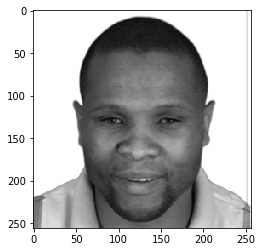

,target,mean,count,path
51,/templates/Image/targets/i004se-mn.png,0.25,4,targets/i004se-mn.png


In [55]:
i = 0
img = Image.open(FILE_PATH[i])
img = img.convert("L").convert("RGB")

# 画像の表示
plt.imshow(img)
plt.show()

# アノテーション表示
df_mean[df_mean['target'].str.contains(FILE_PATH[i])]
# print(df_coolwarm[df_coolwarm['target'].str.contains(FILE_PATH[i])]['cool_warm'].mean())

In [56]:
df_coolwarm[df_coolwarm['target'].str.contains(FILE_PATH[i])][['reference1','reference2','target','impression','cool_warm','impression_minmax']]

,reference1,reference2,target,impression,cool_warm,impression_minmax
1902,/templates/color/RED.png,/templates/color/BLUE.png,/templates/Image/targets/i004se-mn.png,50.0,0,1.000000
4303,/templates/color/BLUE_GREEN.png,/templates/color/RED.png,/templates/Image/targets/i004se-mn.png,-32.0,0,0.127907
4858,/templates/color/RED.png,/templates/color/BLUE_GREEN.png,/templates/Image/targets/i004se-mn.png,9.0,0,0.595960
10202,/templates/color/YELLOW.png,/templates/color/BLUE_GREEN.png,/templates/Image/targets/i004se-mn.png,-20.0,1,0.220930


# 3回以上アノテーションされていて、全て寒色or暖色だとされた画像を見る

In [57]:
n = 3
df_all = df_mean[df_mean['count']>=n]

In [58]:
df_all_cool = df_all[df_all['mean'] == 0]
df_all_warm = df_all[df_all['mean'] == 1]
len(df_all_cool) , len(df_all_warm)

(92, 69)

In [59]:
def show_image(df,i):
    PATH = df['path'].values.tolist()
    img = Image.open(PATH[i])
    img = img.convert("L").convert("RGB")

    # 画像の表示
    plt.imshow(img)
    plt.show()

    # アノテーション表示
    print(df[df['target'].str.contains(PATH[i])][['target','count','mean']])
#     print(df_coolwarm[df_coolwarm['target'].str.contains(PATH[i])][['reference1','reference2','impression','impression_minmax']])

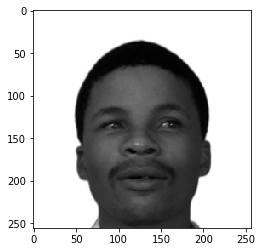

                                    target  count  mean
19  /templates/Image/targets/i001rd-mn.png      3   0.0


In [60]:
for i in range(0,1):
    show_image(df_all_cool,i)

画像をタイル一覧で表示

In [61]:
def show_tile(files,n):
    # タイル状に pm × pm 枚配置
    pm = n
    d = []
    for i in files:
        img = Image.open(i)
        img = img.convert("L").convert("RGB")
        img = np.asarray(img)
        
        d.append(img)
    # タイル状に画像を一覧表示
    fig, ax = plt.subplots(pm, pm, figsize=(10, 10))
    fig.subplots_adjust(hspace=0, wspace=0)
    for i in range(pm):
        for j in range(pm):
            ax[i, j].xaxis.set_major_locator(plt.NullLocator())
            ax[i, j].yaxis.set_major_locator(plt.NullLocator())
            ax[i, j].imshow(d[pm*i+j], cmap="bone")
    plt.show()

In [62]:
domain_list_allcool = df_all_cool[df_all_cool['path'].str.contains('sketch')]['path'].values.tolist()
muct_list_allcool = df_all_cool[df_all_cool['path'].str.contains('-')]['path'].values.tolist()
tezuka_list_allcool = df_all_cool[(~df_all_cool['path'].isin(domain_list_allcool))&(~df_all_cool['path'].isin(muct_list_allcool))]['path'].values.tolist()

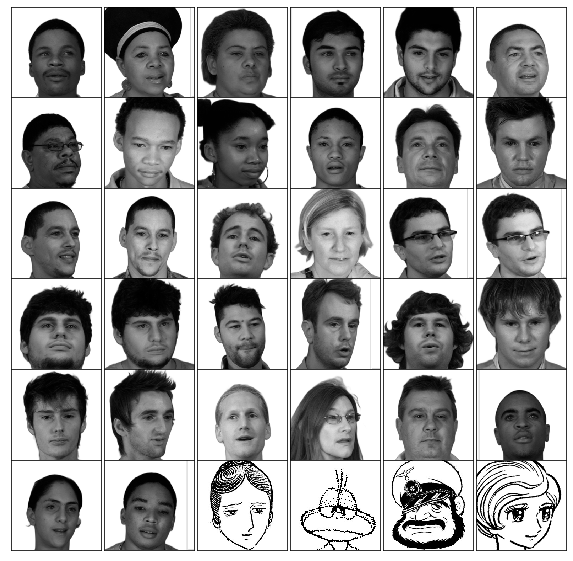

In [63]:
show_tile(muct_list_allcool + tezuka_list_allcool,6)

In [64]:
# 男性がどれほどの割合か？
len([s for s in muct_list_allcool if '-m' in s]) / len(muct_list_allcool)

0.8125

In [65]:
domain_list_allwarm = df_all_warm[df_all_warm['path'].str.contains('sketch')]['path'].values.tolist()
muct_list_allwarm = df_all_warm[df_all_warm['path'].str.contains('-')]['path'].values.tolist()
tezuka_list_allwarm = df_all_warm[(~df_all_warm['path'].isin(domain_list_allwarm))&(~df_all_warm['path'].isin(muct_list_allwarm))]['path'].values.tolist()

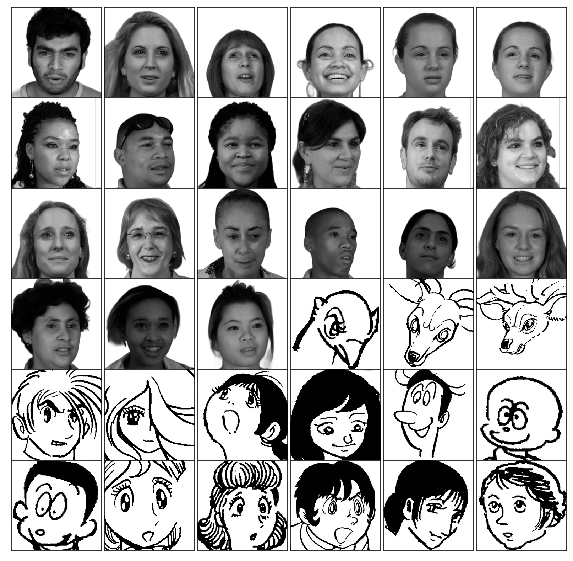

In [66]:
show_tile(muct_list_allwarm + tezuka_list_allwarm,6)

In [67]:
# 女性がどれほどの割合か？
len([s for s in muct_list_allwarm if '-f' in s]) / len(muct_list_allwarm)

0.8095238095238095

domainnetの画像はどのような違いが見えるのか？

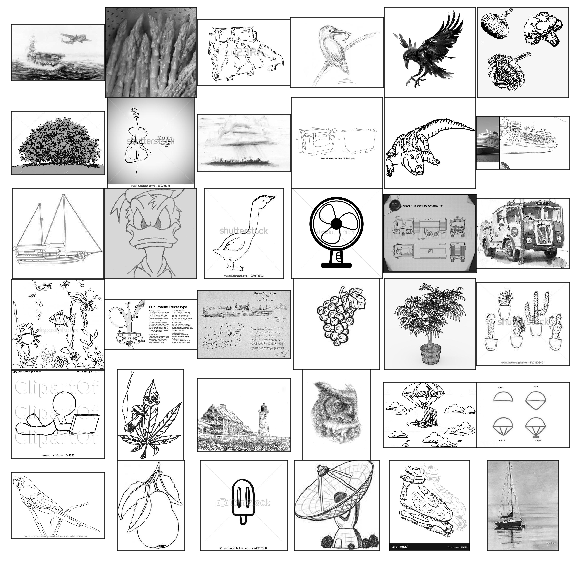

In [68]:
show_tile(domain_list_allcool,6)

IndexError: list index out of range

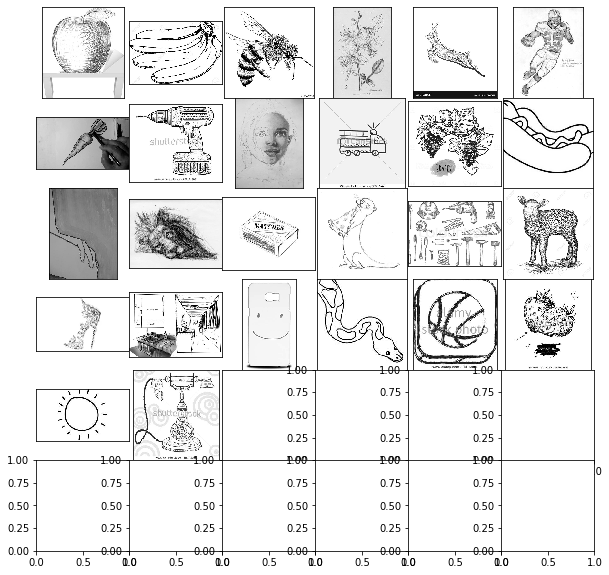

In [69]:
show_tile(domain_list_allwarm,6)

# 4回以上アノテーションされていて、意見が割れた画像を見る

In [71]:
n = 4
df_all = df_mean[df_mean['count']==n]

In [72]:
df_all_coolwarm = df_all[df_all['mean'] == 0.5]
len(df_all_coolwarm)

37

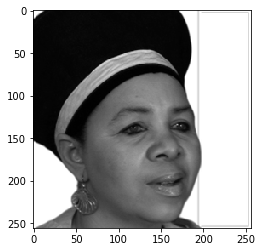

                                    target  count  mean
54  /templates/Image/targets/i005rc-fn.png      4   0.5


In [73]:
for i in range(0,1):
    show_image(df_all_coolwarm,i)

画像をタイル一覧で表示

In [74]:
domain_list_allcoolwarm = df_all_coolwarm[df_all_coolwarm['path'].str.contains('sketch')]['path'].values.tolist()
muct_list_allcoolwarm = df_all_coolwarm[df_all_coolwarm['path'].str.contains('-')]['path'].values.tolist()
tezuka_list_allcoolwarm = df_all_coolwarm[(~df_all_coolwarm['path'].isin(domain_list_allcoolwarm))&(~df_all_coolwarm['path'].isin(muct_list_allcoolwarm))]['path'].values.tolist()

In [75]:
tezuka_list_allcoolwarm

['targets/アキラ_00029.png',
 'targets/ジャネット・バルーン_00002.png',
 'targets/丸首ブーン_00013.png',
 'targets/兵庫県警米山_00018.png',
 'targets/医者スッポ先生_00001.png',
 'targets/大泉京介_00009.png',
 'targets/安東_BJ友達_00001.png']

IndexError: list index out of range

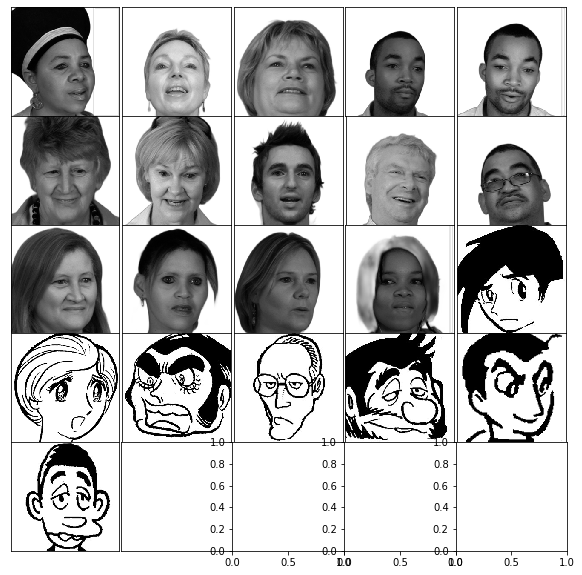

In [76]:
show_tile(muct_list_allcoolwarm + tezuka_list_allcoolwarm,5)

IndexError: list index out of range

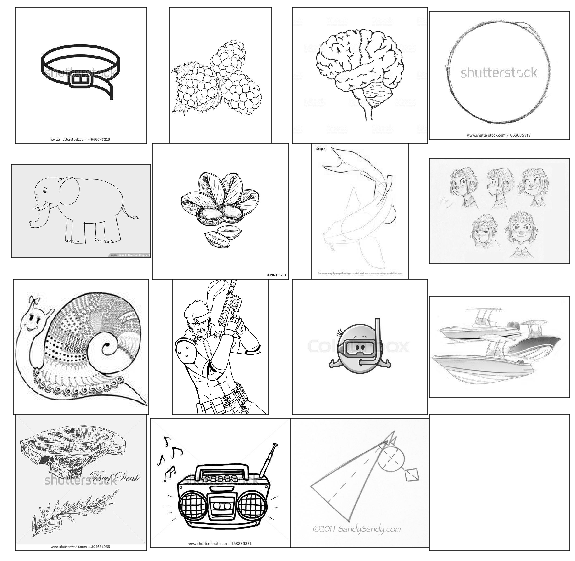

In [77]:
show_tile(domain_list_allcoolwarm[1:],4)

tezuka , DomainNet , muctごとの分布

In [ ]:
df['impression_minmax'].hist(bins=100)

In [ ]:
# カテゴリごとに分ける。
domain_list = df[df['target'].str.contains('sketch')]['target'].values.tolist()
muct_list = df[df['target'].str.contains('-')]['target'].values.tolist()
tezuka_list = df[(~df['target'].isin(domain_list))&(~df['target'].isin(muct_list))]['target'].values.tolist()
# 数の確認
len(df) , len(domain_list) ,len(muct_list) ,len(tezuka_list) 

In [ ]:
df[df['target'].isin(domain_list)]['impression_minmax'].hist(bins=100,alpha=0.5)
df[df['target'].isin(muct_list)]['impression_minmax'].hist(bins=100,alpha=0.5)
df[df['target'].isin(tezuka_list)]['impression_minmax'].hist(bins=100,alpha=0.5)

In [ ]:
df[df['target'].isin(domain_list)]['impression'].hist(bins=100,alpha=0.5)
df[df['target'].isin(muct_list)]['impression'].hist(bins=100,alpha=0.5)
df[df['target'].isin(tezuka_list)]['impression'].hist(bins=100,alpha=0.5)